# Introduction to Machine Learning: Linear Regression

In this notebook, we'll predict a line from random data points.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
np.random.seed(42)

x = np.random.uniform(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, 1, 100)

print(f"Created {len(x)} data points")

Created 100 data points


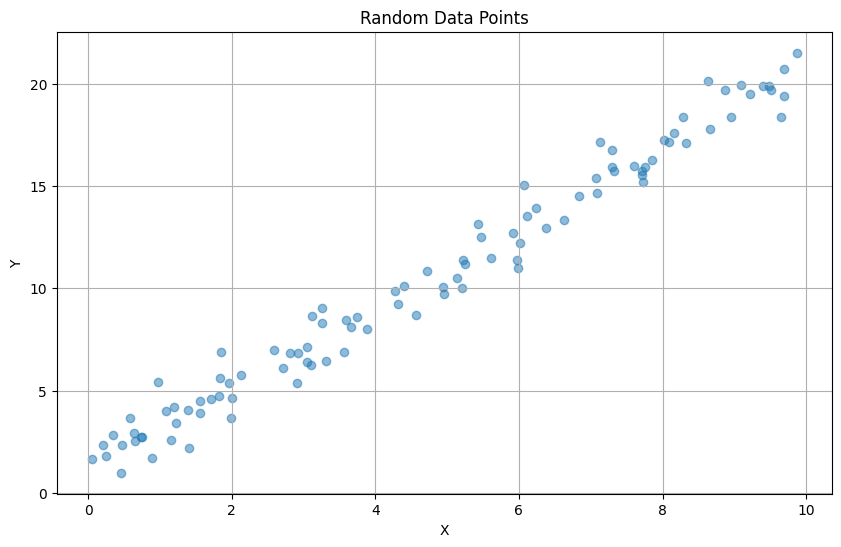

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Random Data Points')
plt.grid(True)
plt.show()

In [6]:
x_reshaped = x.reshape(-1, 1)

model = LinearRegression()
model.fit(x_reshaped, y)

print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Slope: 1.95
Intercept: 1.22


## Understanding Model Evaluation Metrics

**Mean Squared Error (MSE)**

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

- Measures the average squared difference between actual ($y_i$) and predicted ($\hat{y}_i$) values
- Lower values are better (0 = perfect predictions)
- Sensitive to outliers due to squaring
- Units: squared units of the target variable

**R² Score (Coefficient of Determination)**

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}$$

Where:
- $SS_{res}$ = residual sum of squares (prediction errors)
- $SS_{tot}$ = total sum of squares (variance in data)
- $\bar{y}$ = mean of actual values

Range: $(-\infty, 1]$
- $R^2 = 1.0$ → perfect predictions
- $R^2 = 0.0$ → model = predicting the mean
- $R^2 < 0.0$ → model worse than predicting the mean

In [5]:
y_predicted = model.predict(x_reshaped)

r2_score = model.score(x_reshaped, y)
mse = mean_squared_error(y, y_predicted)

print(f"R² score: {r2_score:.3f}")
print(f"Mean Squared Error: {mse:.3f}")

R² score: 0.976
Mean Squared Error: 0.807


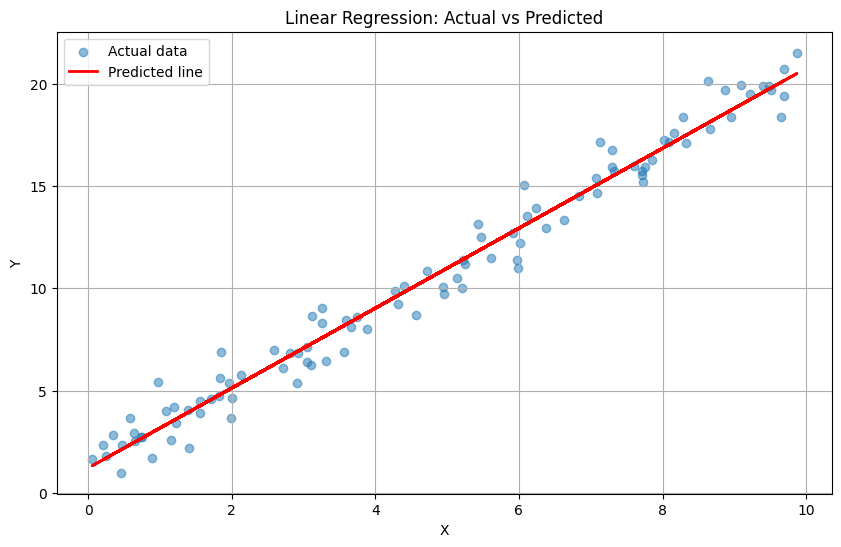

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual data')
plt.plot(x, y_predicted, color='red', linewidth=2, label='Predicted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

In [8]:
new_x = np.array([[3.5], [7.2]])
new_predictions = model.predict(new_x)

for x_val, y_val in zip(new_x, new_predictions):
    print(f"x = {x_val[0]:.1f} → predicted y = {y_val:.2f}")

x = 3.5 → predicted y = 8.05
x = 7.2 → predicted y = 15.28


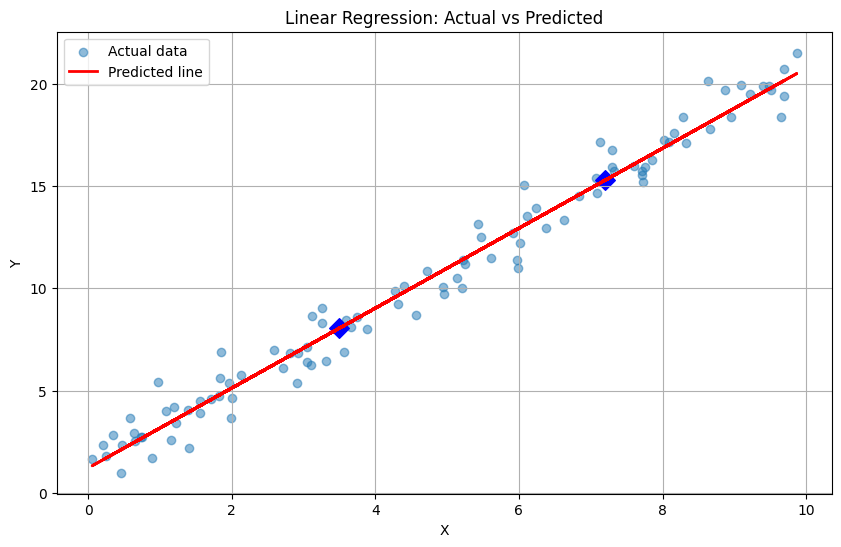

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.5, label='Actual data')
plt.plot(x, y_predicted, color='red', linewidth=2, label='Predicted line')
plt.scatter(x=3.5,y=8.05, marker='D', s=100,c='b')
plt.scatter(x=7.2,y= 15.28, marker='D', s=100,c='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()